# Likelihood Function and Loss Function

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/statcomp](https://feng.li/statcomp)


## Likelihood Function

-   Given that $x_i\sim N(\mu,\sigma)$ for $i=1,...,n$, the **likelihood
    function** is

    $$\prod_{i=1}^n f(x_i,\mu,\sigma)$$

-   However the **log likelihood function** is more often used
    $$\sum_{i=1}^n \log f(x_i,\mu,\sigma)$$

-   Do you know why?

In [6]:
NormLike <- function(mu, sigma, data)
  {
    out = prod(dnorm(x = data, mean = mu, sd = sigma))
    return(out)
  }

logNormLike <- function(mu, sigma, data)
  {
    out = sum(dnorm(
        x = data, mean = mu, sd = sigma,
        log = TRUE))
    return(out)
  }

set.seed(123)
data = rnorm(1000, mean=2, sd=1)
NormLike(mu = 1, sigma = 1, data=data) 
logNormLike(mu = 1, sigma = 1, data=data) 

[1] 0

[1] -1926.434


### Walking APP example: How long do you walk every day?

-   Here is a list about my past six days walking statistics. Can you
    estimate how long do I walk everyday? and what is the variation?


![walking](figures/walking.png)

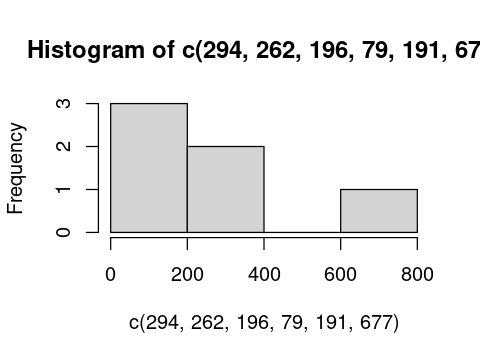

In [7]:
hist(c(294,262,196,79,191,677))

### The likelihood function

-   We assume everyday’s walking steps ($x_i$) are independent, and
    $x_i$ follows standard normal distribution $\sim  N(\mu,\sigma)$, the corresponding likelihood function is

    $$\prod_{i=1}^n f(x_i,\mu,\sigma)$$ which can be easily written in R

-   **The scope** Find a proper combination of $\mu$ and $\sigma$ that
    maximizes the loglikelihood function.

### Conditional likelihood function

-   Fix other parameters

![conddensity](figures/conddensity.png)

Left: fix variance to allow $\mu$ to change with likelihood function. Right: fix mean to allow $\sigma$ to change with likelihood function.

In [8]:
x <- c(294, 262, 196, 79, 191, 677)
mu = 260:300
sigma = 180:220

parMat <- expand.grid(mu, sigma)
muALL <- parMat[, 1]
sigmaALL <- parMat[, 2]

myLogLike <- matrix(NA, 1, length(sigma))
for(i in 1:length(sigmaALL))
{
  myLogLike[i] <- logNormLike(mu = muALL[i], sigma = sigmaALL[i], data = x)
}

```R
persp(as.vector(mu), as.vector(sigma), 
      matrix(myLogLike, length(mu),), 
      theta = 90, phi = 30, expand = 0.5, 
      col = "lightblue", xlab = "mu", 
      ylab = "sigma", zlab = "log likelihood", 
      ticktype = "detailed")

filled.contour(as.vector(mu), as.vector(sigma), 
               matrix(myLogLike, length(mu),), 
               xlab = "mu", ylab = "sigma")
```

- 2D and 3D loglikelihood function

 ![3dlike](figures/3dlike.png)


-   Are $\mu$ and $\sigma$ we obtained the best combination?

 ![2dlike](figures/2dlike.png)


### Likelihood function for linear regression

-   Assume you want to make a regression model
    $$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
    where $\epsilon_i \sim N(0, \sigma^2)$

-   What is the (log) likelihood function?

-   What are the unknown parameters?

-   How do we estimate the parameters?

    -   Write down a likelihood function with respect to the unknown
        parameters.

    -   Use an optimization algorithm to find the estimates of the
        unknown parameters.


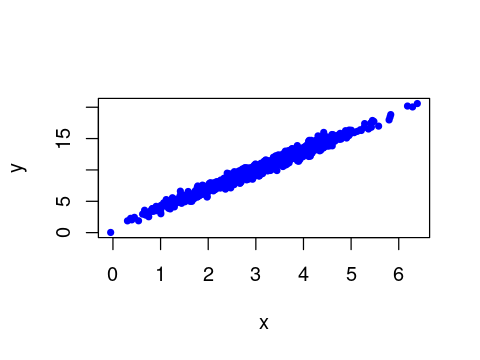

In [9]:
beta0 <- 1
beta1 <- 3
sigma <- 0.5

n <- 1000
x <- rnorm(n, 3, 1)

y <- beta0 +x*beta1 + rnorm(n, mean = 0, sd = sigma)
plot(x, y, col = "blue", pch = 20)

In [10]:
logNormLikelihood <- function(par, y, x)
    {
        beta0 <- par[1]
        beta1 <- par[2]
        sigma <- par[3]
        mean <- beta0 + x*beta1
        logDens <- dnorm(x = y, mean = mean, sd = sigma, log = TRUE)
        loglikelihood <- sum(logDens)
        return(loglikelihood)
    }

optimOut <- optim(c(0.2, 0.3, 0.5), logNormLikelihood,
                  control = list(fnscale = -1),
                  x = x, y = y)

beta0Hat <- optimOut$par[1]
beta1Hat <- optimOut$par[2]
sigmaHat <- optimOut$par[3]
yHat <- beta0Hat + beta1Hat*x

Warning message in dnorm(x = y, mean = mean, sd = sigma, log = TRUE):
“NaNs produced”
Warning message in dnorm(x = y, mean = mean, sd = sigma, log = TRUE):
“NaNs produced”
Warning message in dnorm(x = y, mean = mean, sd = sigma, log = TRUE):
“NaNs produced”


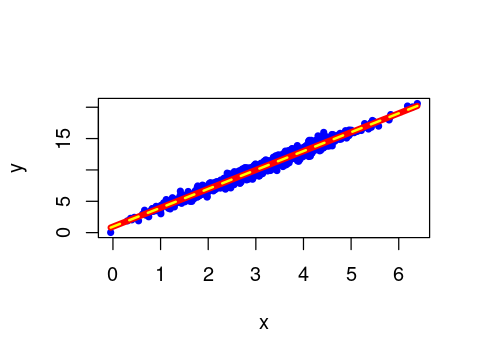

In [11]:
myLM <- lm(y~x)
myLMCoef <- myLM$coefficients
yHatOLS <- myLMCoef[1] + myLMCoef[2]*x

plot(x, y, pch = 20, col = "blue")
points(sort(x), yHat[order(x)], type = "l", col = "red", lwd = 5)
points(sort(x), yHatOLS[order(x)], type = "l", lty = "dashed",
       col = "yellow", lwd = 2, pch = 20)

## Loss function

- Every statistical learning algorithm is trained to learn a prediction. 

- These predictions should be as close as possible to the label value (ground-truth value). 

- The loss function measures how near or far are these predicted values compared to original label values.

- Loss functions are also referred to as error functions as it gives an idea about prediction error.

- Loss Functions, in simple terms, are nothing but an equation that gives the error between the actual value and the predicted value.



### Mean squared error loss

- Mean squared error (MSE) can be computed by taking the actual value and predicted value as the inputs and returning the error via the below equation (mean squared error equation).
$$Loss(\beta_0, \beta_1; y, x) = \frac{1}{N}\sum_{i=1}^{N}(y_i-(\beta_0+\beta_1 x_i))^2$$

- The equation is very simple and thus can be implemented easily as a computer program. Besides that, it is powerful enough to solve complex problems.

- The equation we have is differentiable hence the optimization becomes easy. This is one of the reasons for adopting MSE widely

In [12]:
loss <- function(par, y, x)
    {
        beta0 <- par[1]
        beta1 <- par[2]
        yHat <- beta0 + x*beta1
        out <- mean((y- yHat)^2)
        return(out)
    }

optimLossOut <- optim(c(0.2, 0.3), loss, x = x, y = y)

beta0Hat <- optimLossOut$par[1]
beta1Hat <- optimLossOut$par[2]
yHatLoss <- beta0Hat + beta1Hat*x

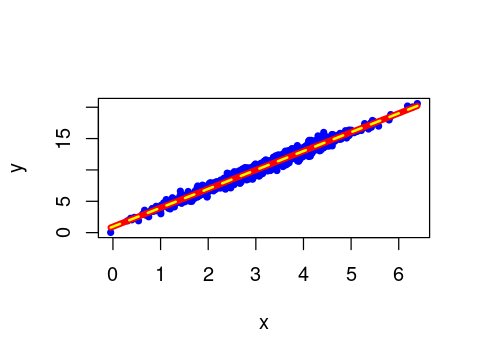

In [13]:
myLM <- lm(y~x)
myLMCoef <- myLM$coefficients
yHatOLS <- myLMCoef[1] + myLMCoef[2]*x

plot(x, y, pch = 20, col = "blue")
points(sort(x), yHatLoss[order(x)], type = "l", col = "red", lwd = 5)
points(sort(x), yHatOLS[order(x)], type = "l", lty = "dashed",
       col = "yellow", lwd = 2, pch = 20)

## Discussion

- What are the advantages and disadvantages of using likelihood function and loss function?